In [ ]:
import warnings
from synthcity.plugins import Plugins
from synthcity.utils.datasets.time_series.google_stocks import GoogleStocksDataloader
from synthcity.plugins.core.dataloader import TimeSeriesDataLoader

warnings.filterwarnings("ignore")


eval_plugin = "timegan"

In [2]:
# Load data
static_data, temporal_data, outcome = GoogleStocksDataloader(seq_len=4).load()
loader = TimeSeriesDataLoader(
    temporal_data=temporal_data, static_data=static_data, outcome=outcome,
)

loader.dataframe()

,temporal_open_t0,temporal_open_t1,temporal_open_t2,temporal_open_t3,temporal_high_t0,temporal_high_t1,temporal_high_t2,temporal_high_t3,temporal_low_t0,temporal_low_t1,...,temporal_close_t3,temporal_volume_t0,temporal_volume_t1,temporal_volume_t2,temporal_volume_t3,temporal_adj_close_t0,temporal_adj_close_t1,temporal_adj_close_t2,temporal_adj_close_t3,out_open_next
0,0.215211,0.223300,0.200914,0.245731,0.207727,0.184407,0.207727,0.199814,0.247252,0.232810,...,0.171810,0.277050,0.204047,0.334132,0.308378,0.210632,0.183920,0.228956,0.171810,0.147661
1,0.331444,0.260947,0.208208,0.212981,0.292675,0.256042,0.205078,0.172838,0.304058,0.247865,...,0.118090,0.200020,0.213233,0.127591,0.315308,0.256316,0.198489,0.187005,0.118090,0.097320
2,0.129095,0.215211,0.223300,0.200914,0.183909,0.207727,0.184407,0.207727,0.171326,0.247252,...,0.228956,0.373930,0.277050,0.204047,0.334132,0.201388,0.210632,0.183920,0.228956,0.149420
3,0.152198,0.114675,0.091740,0.115236,0.164835,0.087166,0.078676,0.137224,0.167408,0.102791,...,0.137216,0.897356,1.000000,0.828301,0.536077,0.153377,0.076480,0.106540,0.137216,0.110283
4,0.280554,0.337752,0.381246,0.277775,0.291565,0.335635,0.339620,0.246782,0.318989,0.376828,...,0.256733,0.046393,0.037910,0.216044,0.090091,0.318435,0.359035,0.260180,0.256733,0.105667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.681576,0.636042,0.665050,0.834838,0.656814,0.652603,0.806027,0.836003,0.679285,0.688811,...,0.841683,0.014319,0.022601,0.067221,0.000000,0.608171,0.640021,0.809833,0.841683,0.636042
89,0.267568,0.250773,0.255837,0.317405,0.259325,0.223372,0.274279,0.427341,0.285653,0.264738,...,0.454574,0.267980,0.159714,0.147888,0.347461,0.238288,0.244052,0.301165,0.454574,0.665050
90,0.355297,0.319444,0.330682,0.392843,0.349061,0.292505,0.354438,0.406953,0.376624,0.351099,...,0.430519,0.087359,0.058793,0.070809,0.046833,0.316085,0.315218,0.373297,0.430519,0.834838
91,0.284666,0.250045,0.328755,0.351051,0.259257,0.309270,0.326930,0.359147,0.298846,0.264897,...,0.387493,0.094674,0.148285,0.101501,0.081510,0.243822,0.329019,0.336429,0.387493,0.870378


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(loader)

In [4]:
# Generate new samples

syn_model.generate(count=10).dataframe()

,temporal_open_t0,temporal_open_t1,temporal_open_t2,temporal_open_t3,temporal_high_t0,temporal_high_t1,temporal_high_t2,temporal_high_t3,temporal_low_t0,temporal_low_t1,...,temporal_close_t3,temporal_volume_t0,temporal_volume_t1,temporal_volume_t2,temporal_volume_t3,temporal_adj_close_t0,temporal_adj_close_t1,temporal_adj_close_t2,temporal_adj_close_t3,out_open_next
0,0.240838,0.227979,0.231557,0.226907,0.156350,0.163970,0.315202,0.322394,0.227306,0.227471,...,0.217882,0.090401,0.086456,0.084110,0.085594,0.212913,0.221334,0.236399,0.241543,0.282902
1,0.240840,0.227984,0.231560,0.226898,0.156353,0.163979,0.315200,0.322397,0.227310,0.227481,...,0.217885,0.090403,0.086459,0.084113,0.085595,0.212897,0.221334,0.236401,0.241539,0.282902
2,0.240840,0.227984,0.231560,0.226898,0.156353,0.163979,0.315200,0.322397,0.227309,0.227481,...,0.217885,0.090403,0.086459,0.084113,0.085595,0.212898,0.221334,0.236401,0.241539,0.282902
3,0.240840,0.227984,0.231560,0.226898,0.156353,0.163979,0.315200,0.322397,0.227309,0.227481,...,0.217885,0.090403,0.086459,0.084113,0.085595,0.212898,0.221334,0.236401,0.241539,0.282902
4,0.240840,0.227984,0.231560,0.226898,0.156353,0.163979,0.315200,0.322397,0.227309,0.227481,...,0.217885,0.090403,0.086459,0.084113,0.085595,0.212898,0.221334,0.236401,0.241539,0.282902
5,0.240838,0.227979,0.231557,0.226907,0.156350,0.163970,0.315202,0.322394,0.227306,0.227471,...,0.217882,0.090401,0.086456,0.084110,0.085594,0.212913,0.221334,0.236399,0.241543,0.282902
6,0.240838,0.227979,0.231557,0.226907,0.156350,0.163970,0.315202,0.322394,0.227306,0.227471,...,0.217882,0.090401,0.086456,0.084110,0.085594,0.212913,0.221334,0.236399,0.241543,0.282902
7,0.240840,0.227984,0.231560,0.226898,0.156353,0.163979,0.315200,0.322397,0.227310,0.227481,...,0.217885,0.090403,0.086459,0.084113,0.085595,0.212897,0.221334,0.236401,0.241539,0.282902
8,0.240840,0.227984,0.231560,0.226898,0.156353,0.163979,0.315200,0.322397,0.227310,0.227481,...,0.217885,0.090403,0.086459,0.084113,0.085595,0.212897,0.221334,0.236401,0.241539,0.282902
9,0.240840,0.227984,0.231560,0.226898,0.156353,0.163979,0.315200,0.322397,0.227310,0.227481,...,0.217885,0.090403,0.086459,0.084113,0.085595,0.212897,0.221334,0.236401,0.241539,0.282902


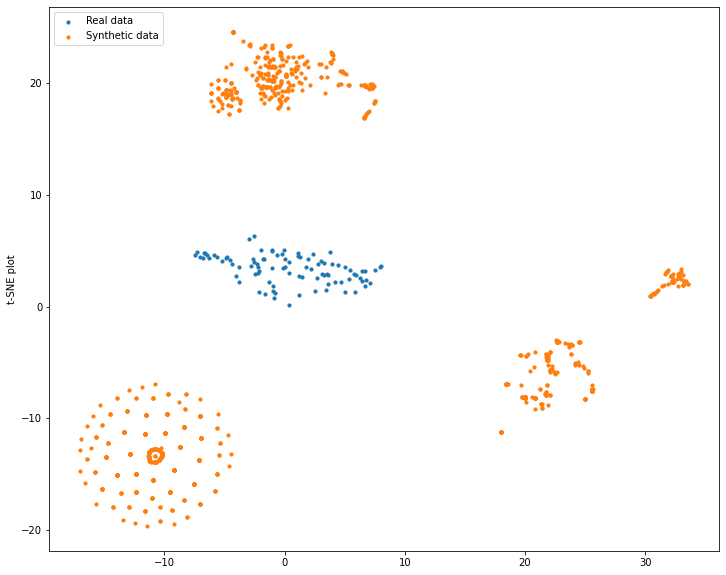

In [5]:
# plot

import matplotlib.pyplot as plt

syn_model.plot(plt, loader, count=1000, plots=["tsne"])

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate([eval_plugin], loader, task_type="time_series", repeats=2,)

In [7]:
Benchmarks.print(score)


Plugin : timegan


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch.score,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.0
sanity.common_rows_proportion.score,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.01
sanity.nearest_syn_neighbor_distance.mean,0.204771,0.222653,0.213712,0.008941,0.213712,0.008941,2,0,0.0
sanity.close_values_probability.score,0.594595,0.635135,0.614865,0.02027,0.614865,0.02027,2,0,0.0
sanity.distant_values_probability.score,0.027027,0.027027,0.027027,0.0,0.027027,0.0,2,0,0.0
stats.jensenshannon_dist.marginal,0.626935,0.635736,0.631335,0.0044,0.631335,0.0044,2,0,0.16
stats.chi_squared_test.marginal,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0.02
stats.feature_corr.joint,27.852471,28.806792,28.329632,0.477161,28.329632,0.477161,2,0,0.18
stats.inv_kl_divergence.marginal,0.054005,0.054527,0.054266,0.000261,0.054266,0.000261,2,0,0.01
stats.ks_test.marginal,0.357297,0.395135,0.376216,0.018919,0.376216,0.018919,2,0,0.01
